In [1]:
# Import packages in alphabetical order
import pandas as pd
import tiktoken
import os
import openai
import duckdb
import owlready2
import seaborn as sns
import sklearn

import gensim
import matplotlib.pyplot as plt
import nltk
import pickle
import re
import spacy
import string

# Import packages in alphabetical order to avoid duplicates
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from transformers import BertModel, BertTokenizer
from wordcloud import WordCloud

In [11]:
import numpy as np

In [9]:
#Load dataframe summary_100_eval from pickle
with open('Datasets/summary_100_eval.pkl', 'rb') as f:
    summary_100_eval = pickle.load(f)

In [5]:
#Call summary_100_eval head
summary_100_eval.head()

,article_id,sentence,processed_sentence,summary_mistral,summary_llama,precision_mistral,recall_mistral,f1_mistral,precision_llama,recall_llama,f1_llama
0,50450,Association for Information Systems AIS Electr...,association for information systems ais electr...,The study aims to examine the differences in ...,\n\nThe article presents the research of the \...,0.718787,0.658720,0.687444,0.732148,0.573293,0.643055
1,13667,Communications of the Association for Informat...,communications of the association for informat...,The longitudinal study on the supply and dema...,Default Summary Default Summary Default Summary,0.710817,0.731577,0.721048,0.185275,0.166151,0.175193
2,11457,Effective organizational improvisation in info...,effective organizational improvisation in info...,The study focuses on understanding organizati...,Default Summary \nThe text is an abstract of a...,0.704064,0.697286,0.700659,0.692760,0.581827,0.632466
3,46549,Researching the Costs of Information Systems T...,researching the costs of information systems t...,The paper examines research gaps in understan...,\n\nThe text summarizes a research paper that ...,0.630737,0.665575,0.647688,0.721754,0.666411,0.692979
4,30587,Holographic Recommendations in Brick - and - M...,holographic recommendations in brick and morta...,The researchers propose an in-store recommend...,\n\nThe text presents a research project that ...,0.672580,0.657886,0.665152,0.715184,0.600278,0.652712


In [6]:
#Add a new column to the dataframe with the number of tokens in sentence and processed_sentence
summary_100_eval['num_tokens_sentence'] = summary_100_eval['sentence'].apply(lambda x: len(x.split()))
summary_100_eval['num_tokens_processed_sentence'] = summary_100_eval['processed_sentence'].apply(lambda x: len(x.split()))

#Call summary_100_eval head
summary_100_eval.head()


,article_id,sentence,processed_sentence,summary_mistral,summary_llama,precision_mistral,recall_mistral,f1_mistral,precision_llama,recall_llama,f1_llama,num_tokens_sentence,num_tokens_processed_sentence
0,50450,Association for Information Systems AIS Electr...,association for information systems ais electr...,The study aims to examine the differences in ...,\n\nThe article presents the research of the \...,0.718787,0.658720,0.687444,0.732148,0.573293,0.643055,3431,2851
1,13667,Communications of the Association for Informat...,communications of the association for informat...,The longitudinal study on the supply and dema...,Default Summary Default Summary Default Summary,0.710817,0.731577,0.721048,0.185275,0.166151,0.175193,8619,6617
2,11457,Effective organizational improvisation in info...,effective organizational improvisation in info...,The study focuses on understanding organizati...,Default Summary \nThe text is an abstract of a...,0.704064,0.697286,0.700659,0.692760,0.581827,0.632466,9737,7896
3,46549,Researching the Costs of Information Systems T...,researching the costs of information systems t...,The paper examines research gaps in understan...,\n\nThe text summarizes a research paper that ...,0.630737,0.665575,0.647688,0.721754,0.666411,0.692979,15438,12924
4,30587,Holographic Recommendations in Brick - and - M...,holographic recommendations in brick and morta...,The researchers propose an in-store recommend...,\n\nThe text presents a research project that ...,0.672580,0.657886,0.665152,0.715184,0.600278,0.652712,5653,4676


In [8]:
#Calculate the average of every precision, recall, and F1 for Mistral and LLaMA

#Calculate and print precision_mistral
precision_mistral = summary_100_eval['precision_mistral'].mean()
print("Precision Mistral: ", precision_mistral)

#Calculate and print recall_mistral
recall_mistral = summary_100_eval['recall_mistral'].mean()
print("Recall Mistral: ", recall_mistral)

#Calculate and print f1_mistral
f1_mistral = summary_100_eval['f1_mistral'].mean()
print("F1 Mistral: ", f1_mistral)

#Calculate and print precision_llama
precision_llama = summary_100_eval['precision_llama'].mean()
print("Precision Llama: ", precision_llama)

#Calculate and print recall_llama
recall_llama = summary_100_eval['recall_llama'].mean()
print("Recall Llama: ", recall_llama)

#Calculate and print f1_llama
f1_llama = summary_100_eval['f1_llama'].mean()
print("F1 Llama: ", f1_llama)


Precision Mistral:  0.6891552776098251
Recall Mistral:  0.6597729675471783
F1 Mistral:  0.6724949391186237
Precision Llama:  0.6994270995259285
Recall Llama:  0.5749401289224625
F1 Llama:  0.6281892047822475


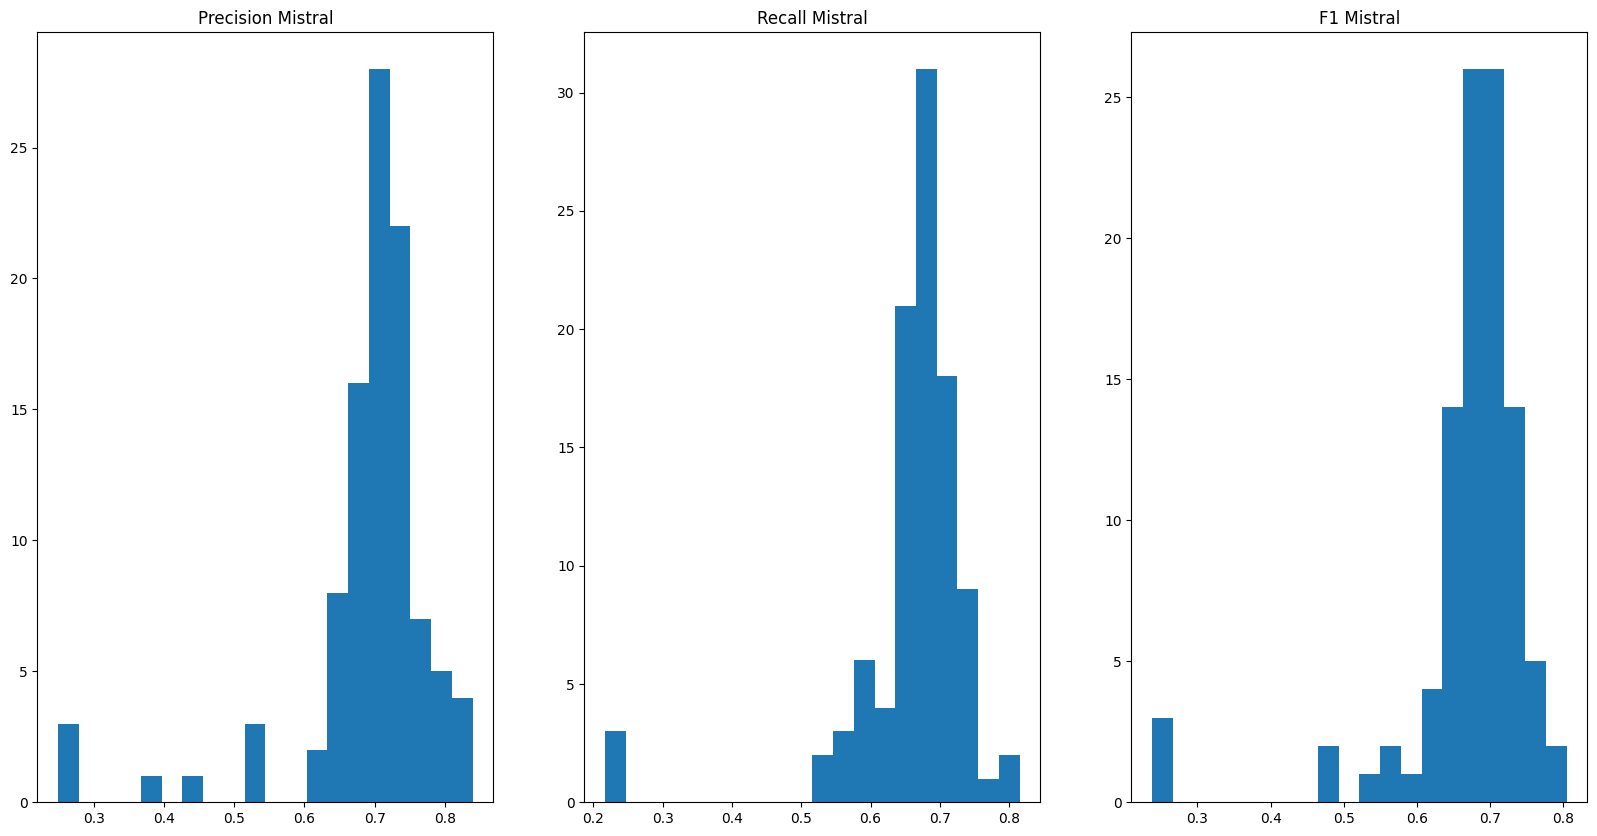

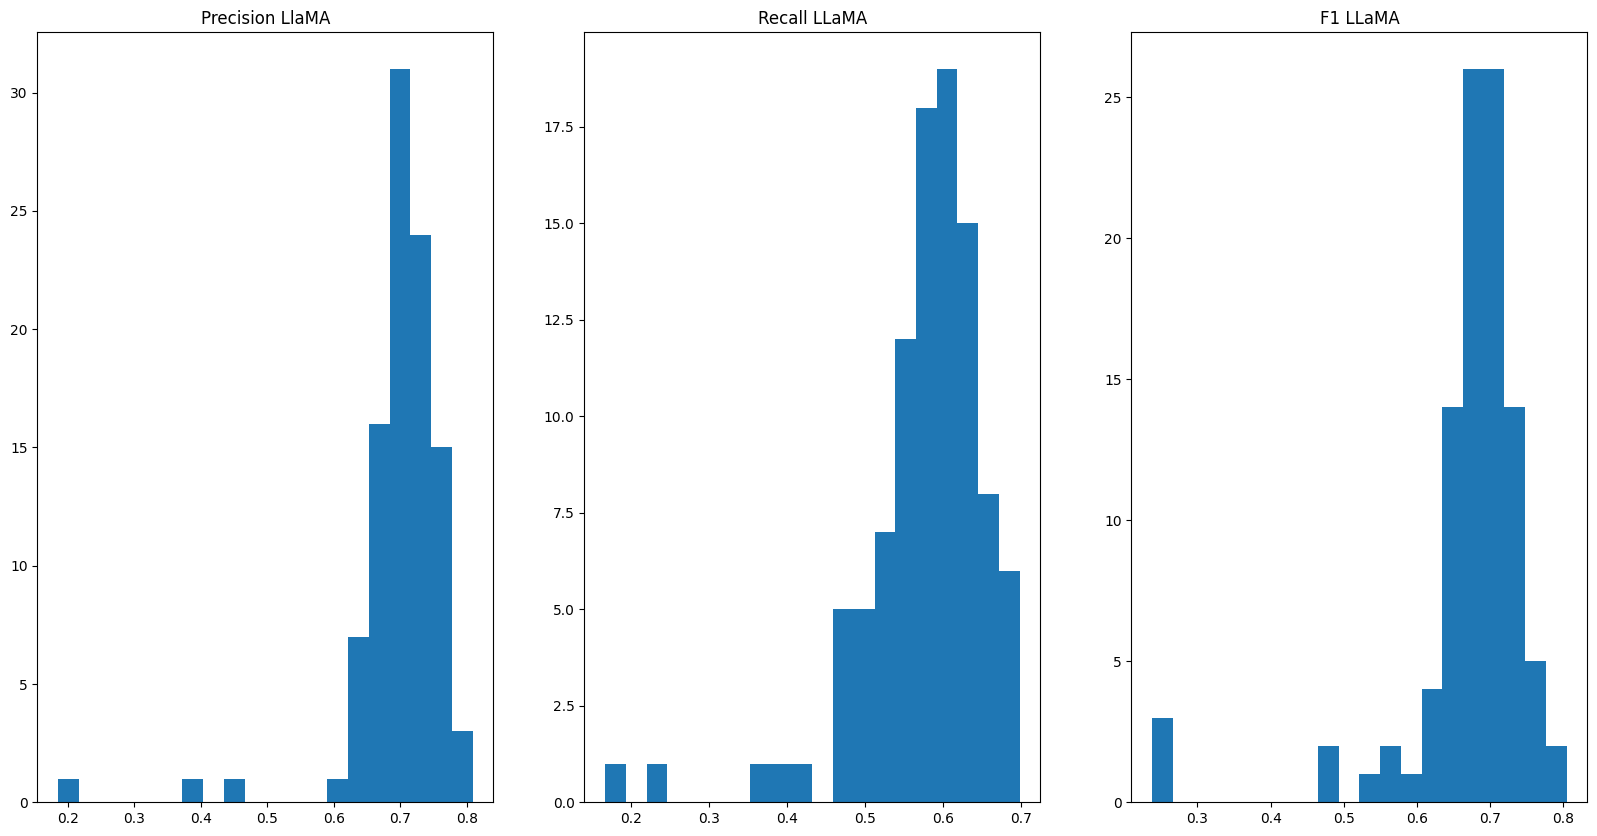

In [7]:
#Create a distribution chart for every precision, recall, and f1 score from mistral and llama
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.hist(summary_100_eval['precision_mistral'], bins=20)
plt.title('Precision Mistral')


plt.subplot(1, 3, 2)
plt.hist(summary_100_eval['recall_mistral'], bins=20)
plt.title('Recall Mistral')

plt.subplot(1, 3, 3)
plt.hist(summary_100_eval['f1_mistral'], bins=20)
plt.title('F1 Mistral')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.hist(summary_100_eval['precision_llama'], bins=20)
plt.title('Precision LlaMA')

plt.subplot(1, 3, 2)
plt.hist(summary_100_eval['recall_llama'], bins=20)
plt.title('Recall LLaMA')

plt.subplot(1, 3, 3)
plt.hist(summary_100_eval['f1_mistral'], bins=20)
plt.title('F1 LLaMA')
plt.show()



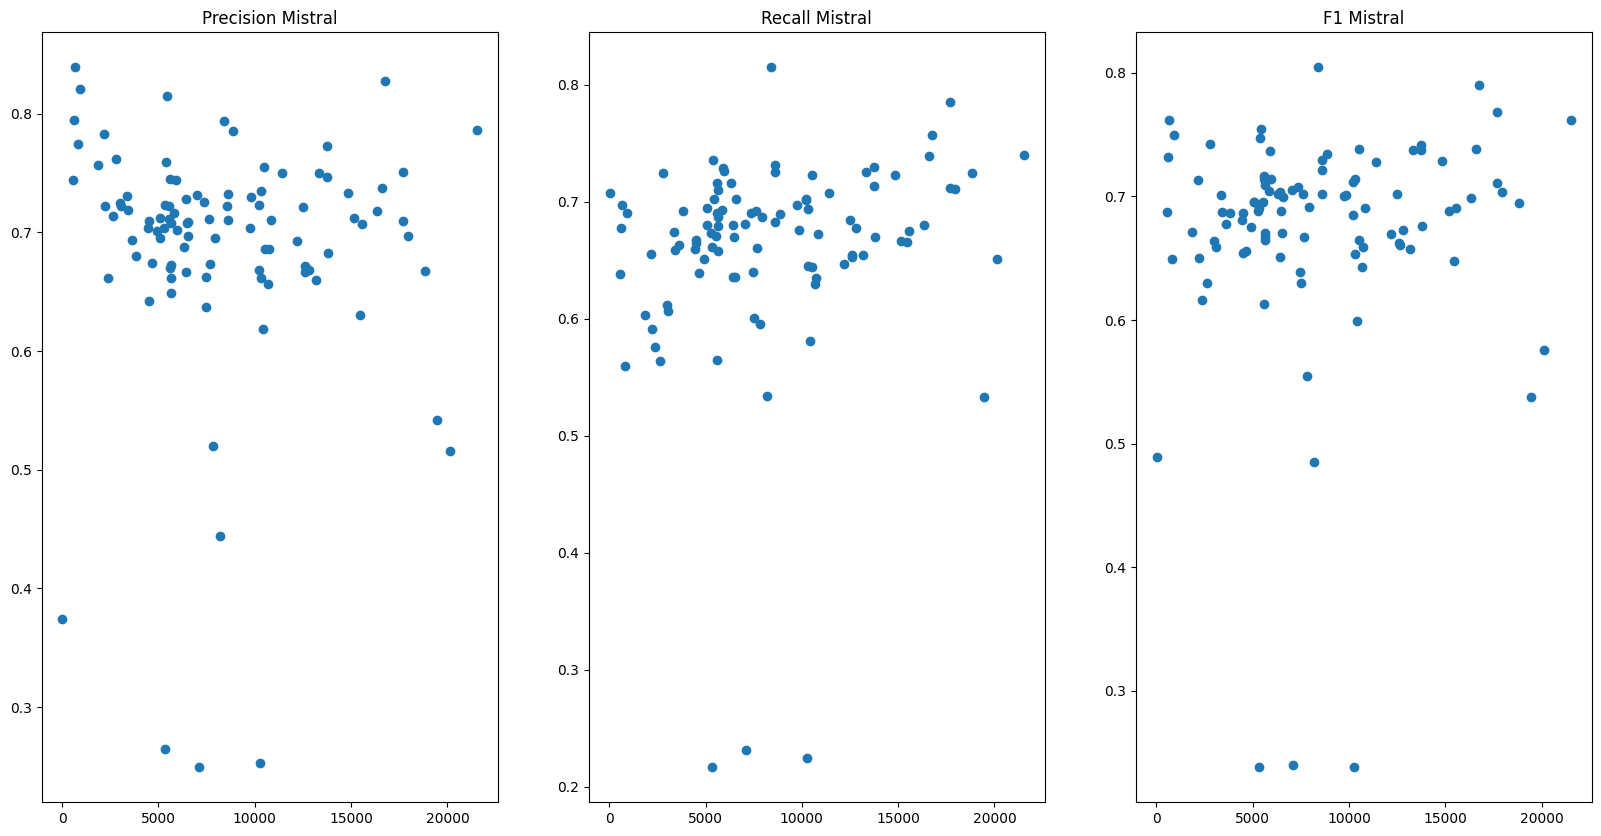

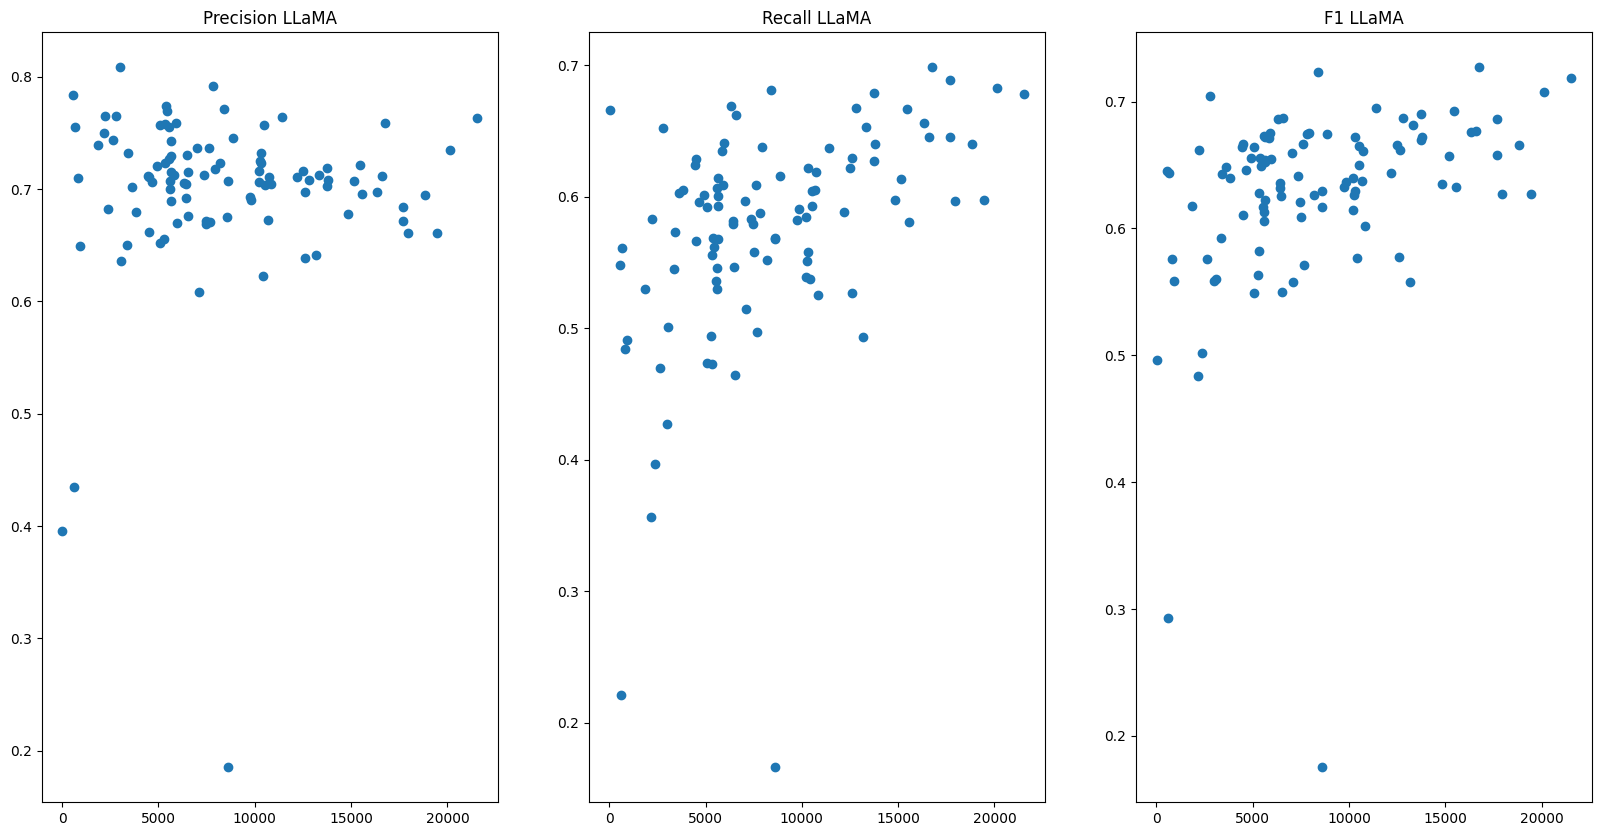

In [10]:
#Create a correlation function plot between the number of tokens in sentence and precision, recall, and f1 score from mistral and llama
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.scatter(summary_100_eval['num_tokens_sentence'], summary_100_eval['precision_mistral'])
plt.title('Precision Mistral')

plt.subplot(1, 3, 2)
plt.scatter(summary_100_eval['num_tokens_sentence'], summary_100_eval['recall_mistral'])
plt.title('Recall Mistral')

plt.subplot(1, 3, 3)
plt.scatter(summary_100_eval['num_tokens_sentence'], summary_100_eval['f1_mistral'])
plt.title('F1 Mistral')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.scatter(summary_100_eval['num_tokens_sentence'], summary_100_eval['precision_llama'])
plt.title('Precision LLaMA')

plt.subplot(1, 3, 2)
plt.scatter(summary_100_eval['num_tokens_sentence'], summary_100_eval['recall_llama'])
plt.title('Recall LLaMA')

plt.subplot(1, 3, 3)
plt.scatter(summary_100_eval['num_tokens_sentence'], summary_100_eval['f1_llama'])
plt.title('F1 LLaMA')
plt.show()

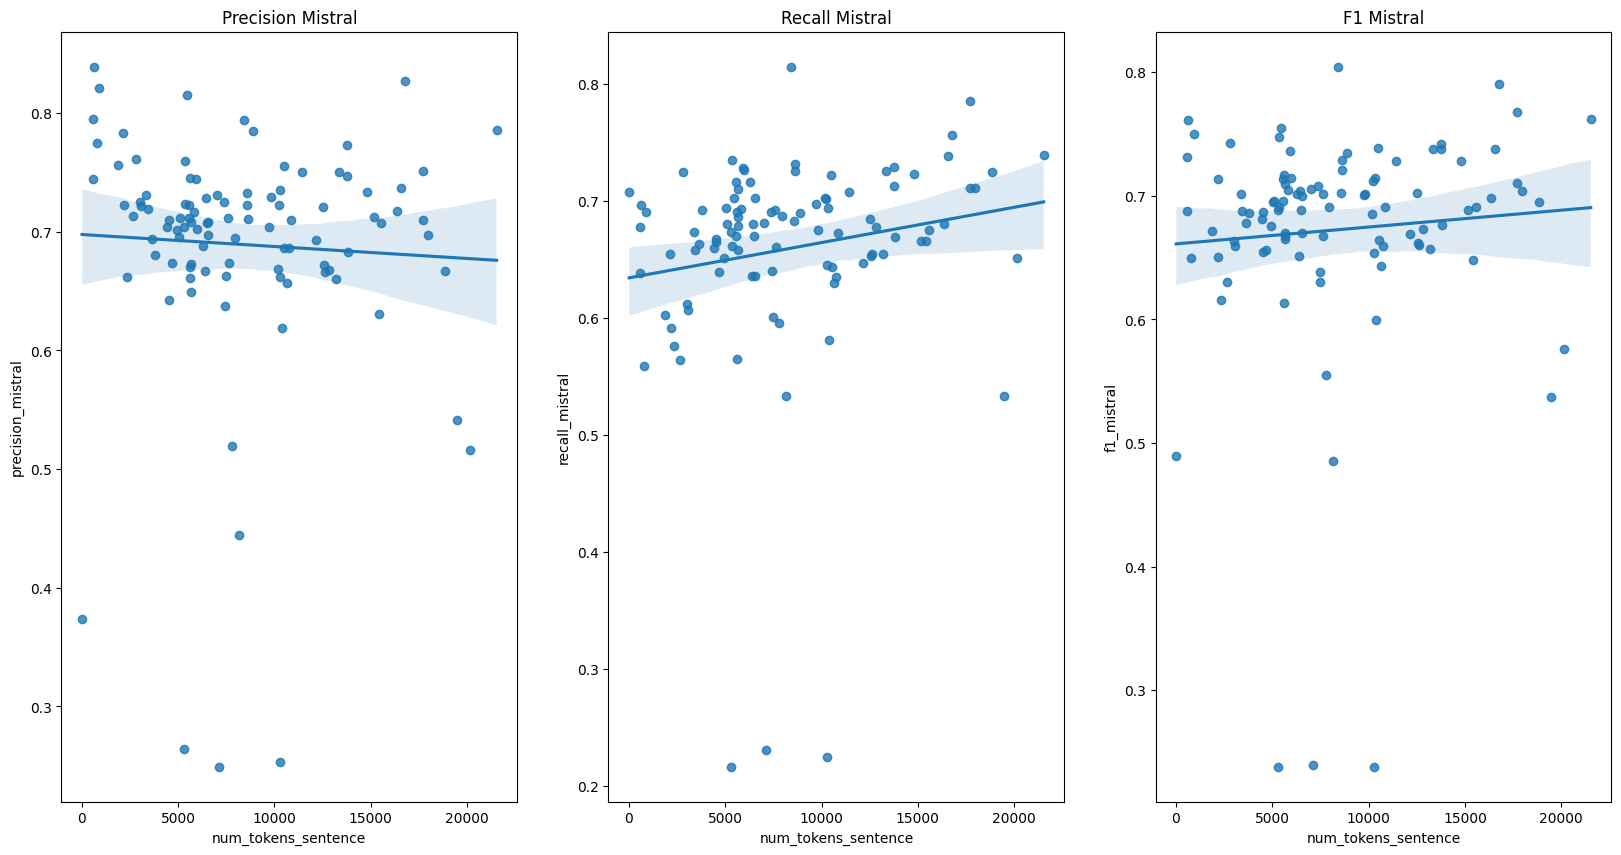

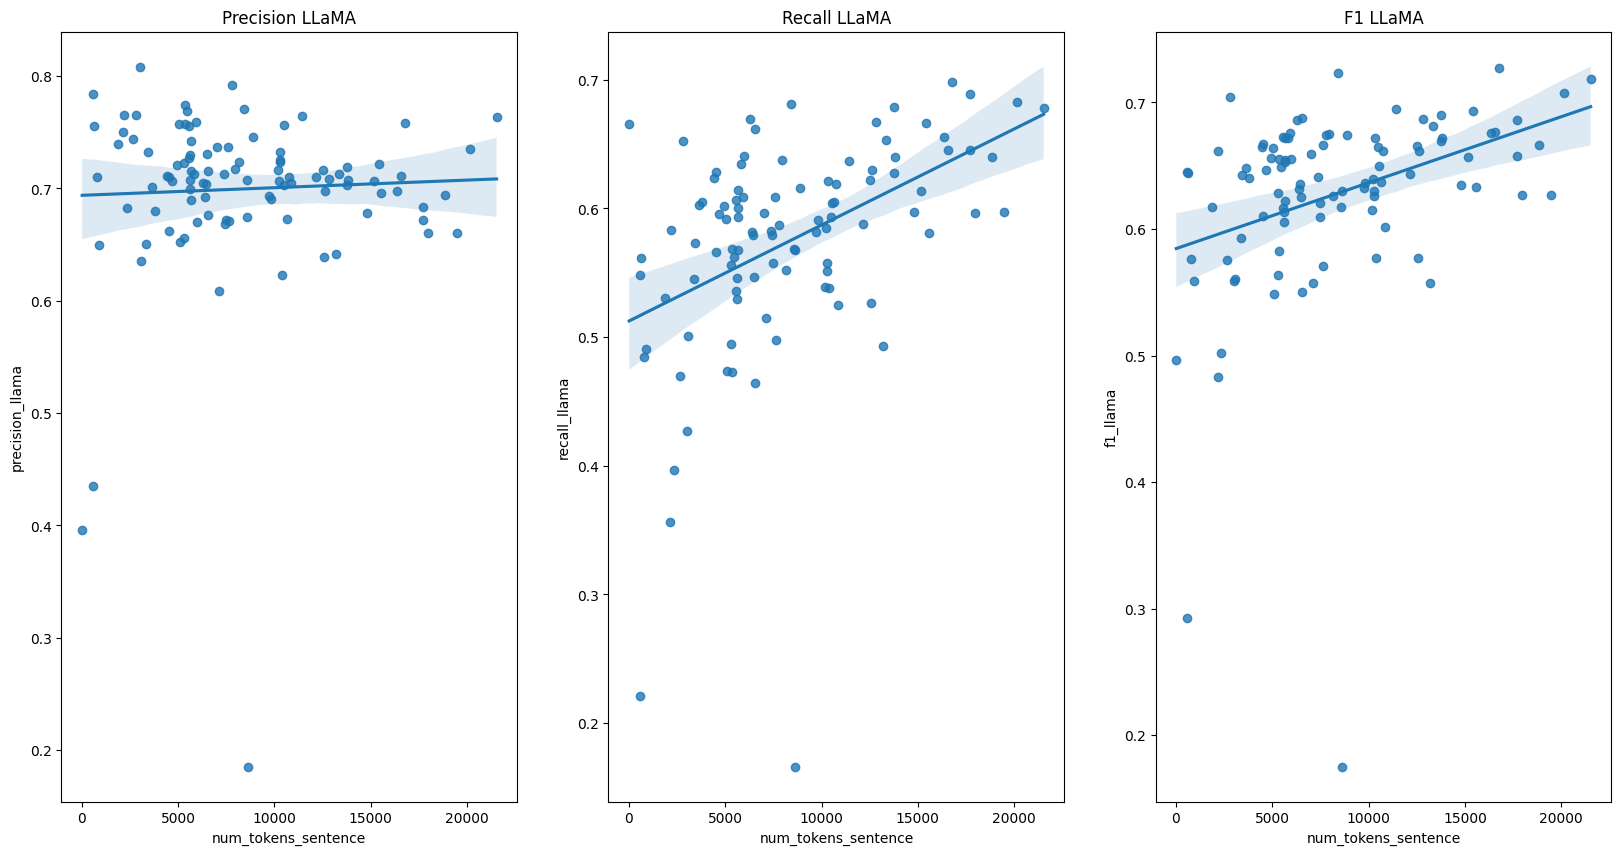

In [13]:
#Create a regression plot between the number of tokens in sentence and precision, recall, and f1 score from mistral and llama
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.regplot(x='num_tokens_sentence', y='precision_mistral', data=summary_100_eval)
plt.title('Precision Mistral')

plt.subplot(1, 3, 2)
sns.regplot(x='num_tokens_sentence', y='recall_mistral', data=summary_100_eval)
plt.title('Recall Mistral')

plt.subplot(1, 3, 3)
sns.regplot(x='num_tokens_sentence', y='f1_mistral', data=summary_100_eval)
plt.title('F1 Mistral')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.regplot(x='num_tokens_sentence', y='precision_llama', data=summary_100_eval)
plt.title('Precision LLaMA')

plt.subplot(1, 3, 2)
sns.regplot(x='num_tokens_sentence', y='recall_llama', data=summary_100_eval)
plt.title('Recall LLaMA')

plt.subplot(1, 3, 3)
sns.regplot(x='num_tokens_sentence', y='f1_llama', data=summary_100_eval)
plt.title('F1 LLaMA')
plt.show()

In [14]:
#Calculate the number of data points where the precision, recall, and f1 score from mistral and llama are below 0.6
print("Number of data points where precision_mistral is below 0.6: ", len(summary_100_eval[summary_100_eval['precision_mistral'] < 0.6]))
print("Number of data points where recall_mistral is below 0.6: ", len(summary_100_eval[summary_100_eval['recall_mistral'] < 0.6]))
print("Number of data points where f1_mistral is below 0.6: ", len(summary_100_eval[summary_100_eval['f1_mistral'] < 0.6]))
print("Number of data points where precision_llama is below 0.6: ", len(summary_100_eval[summary_100_eval['precision_llama'] < 0.6]))
print("Number of data points where recall_llama is below 0.6: ", len(summary_100_eval[summary_100_eval['recall_llama'] < 0.6]))
print("Number of data points where f1_llama is below 0.6: ", len(summary_100_eval[summary_100_eval['f1_llama'] < 0.6]))

Number of data points where precision_mistral is below 0.6:  8
Number of data points where recall_mistral is below 0.6:  12
Number of data points where f1_mistral is below 0.6:  9
Number of data points where precision_llama is below 0.6:  3
Number of data points where recall_llama is below 0.6:  59
Number of data points where f1_llama is below 0.6:  20


In [10]:
#Calculate the number of data points where the precision, recall, and f1 score from mistral and llama are below 0.6 as percentage of the total number of data points
print("Percentage of data points where precision_mistral is below 0.6: ", (len(summary_100_eval[summary_100_eval['precision_mistral'] < 0.6])/len(summary_100_eval))*100)
print("Percentage of data points where recall_mistral is below 0.6: ", (len(summary_100_eval[summary_100_eval['recall_mistral'] < 0.6])/len(summary_100_eval))*100)
print("Percentage of data points where f1_mistral is below 0.6: ", (len(summary_100_eval[summary_100_eval['f1_mistral'] < 0.6])/len(summary_100_eval))*100)
print("Percentage of data points where precision_llama is below 0.6: ", (len(summary_100_eval[summary_100_eval['precision_llama'] < 0.6])/len(summary_100_eval))*100)
print("Percentage of data points where recall_llama is below 0.6: ", (len(summary_100_eval[summary_100_eval['recall_llama'] < 0.6])/len(summary_100_eval))*100)
print("Percentage of data points where f1_llama is below 0.6: ", (len(summary_100_eval[summary_100_eval['f1_llama'] < 0.6])/len(summary_100_eval))*100)

Percentage of data points where precision_mistral is below 0.6:  8.0
Percentage of data points where recall_mistral is below 0.6:  12.0
Percentage of data points where f1_mistral is below 0.6:  9.0
Percentage of data points where precision_llama is below 0.6:  3.0
Percentage of data points where recall_llama is below 0.6:  59.0
Percentage of data points where f1_llama is below 0.6:  20.0


Now into 300 datapoints

In [2]:
#Load dataframe summary_300_eval from pickle
with open('Datasets/summary_300_eval.pkl', 'rb') as f:
    summary_300_eval = pickle.load(f)

In [3]:
#Call summary_300_eval head
summary_300_eval.head()

,article_id,sentence,processed_sentence,summary_mistral,summary_llama,precision_mistral,recall_mistral,f1_mistral,precision_llama,recall_llama,f1_llama
0,17917,The firm 's continuance intentions to use inte...,the firm continuance intentions to use inter o...,The research focuses on examining the influen...,\n \n\nThe text reviews the literature on the ...,0.711649,0.708032,0.709836,0.653560,0.618974,0.635797
1,9570,The Philosopher 's Corner : Beyond Epistemolog...,the philosopher corner beyond epistemology and...,The discussion revolves around interpreting P...,\n\nThe text is a summary of a philosophical d...,0.683973,0.678129,0.681038,0.732366,0.628799,0.676642
2,45666,Interplay of Competition where ln Innovation w...,interplay of competition where ln innovation w...,The text discusses an analysis of competition...,\n\nThe text summarizes the main idea of the r...,0.695689,0.655170,0.674822,0.611366,0.636767,0.623808
3,39308,The Impact of Crowdsourcing on Organisational ...,the impact of crowdsourcing on organisational ...,The research focuses on understanding the imp...,"\nThe paper examines how crowdmapping, a form ...",0.629071,0.617529,0.623247,0.650022,0.604516,0.626444
4,23440,Association for Information Systems Associatio...,association for information systems associatio...,The researchers focus on understanding the pr...,Default Summary Default Summary Default Summar...,0.710848,0.747031,0.728491,0.640211,0.524985,0.576901


In [4]:
#Add a new column to the dataframe with the number of tokens in sentence and processed_sentence
summary_300_eval['num_tokens_sentence'] = summary_300_eval['sentence'].apply(lambda x: len(x.split()))
summary_300_eval['num_tokens_processed_sentence'] = summary_300_eval['processed_sentence'].apply(lambda x: len(x.split()))

#Call summary_300_eval head
summary_300_eval.head()

,article_id,sentence,processed_sentence,summary_mistral,summary_llama,precision_mistral,recall_mistral,f1_mistral,precision_llama,recall_llama,f1_llama,num_tokens_sentence,num_tokens_processed_sentence
0,17917,The firm 's continuance intentions to use inte...,the firm continuance intentions to use inter o...,The research focuses on examining the influen...,\n \n\nThe text reviews the literature on the ...,0.711649,0.708032,0.709836,0.653560,0.618974,0.635797,12757,10141
1,9570,The Philosopher 's Corner : Beyond Epistemolog...,the philosopher corner beyond epistemology and...,The discussion revolves around interpreting P...,\n\nThe text is a summary of a philosophical d...,0.683973,0.678129,0.681038,0.732366,0.628799,0.676642,9493,7984
2,45666,Interplay of Competition where ln Innovation w...,interplay of competition where ln innovation w...,The text discusses an analysis of competition...,\n\nThe text summarizes the main idea of the r...,0.695689,0.655170,0.674822,0.611366,0.636767,0.623808,9430,7864
3,39308,The Impact of Crowdsourcing on Organisational ...,the impact of crowdsourcing on organisational ...,The research focuses on understanding the imp...,"\nThe paper examines how crowdmapping, a form ...",0.629071,0.617529,0.623247,0.650022,0.604516,0.626444,9129,7648
4,23440,Association for Information Systems Associatio...,association for information systems associatio...,The researchers focus on understanding the pr...,Default Summary Default Summary Default Summar...,0.710848,0.747031,0.728491,0.640211,0.524985,0.576901,9145,7541


In [5]:
#Calculate the average of every precision, recall, and F1 for Mistral and LLaMA

#Calculate and print precision_mistral
precision_mistral = summary_300_eval['precision_mistral'].mean()
print("Precision Mistral: ", precision_mistral)

#Calculate and print recall_mistral
recall_mistral = summary_300_eval['recall_mistral'].mean()
print("Recall Mistral: ", recall_mistral)

#Calculate and print f1_mistral
f1_mistral = summary_300_eval['f1_mistral'].mean()
print("F1 Mistral: ", f1_mistral)

#Calculate and print precision_llama
precision_llama = summary_300_eval['precision_llama'].mean()
print("Precision Llama: ", precision_llama)

#Calculate and print recall_llama
recall_llama = summary_300_eval['recall_llama'].mean()
print("Recall Llama: ", recall_llama)

#Calculate and print f1_llama
f1_llama = summary_300_eval['f1_llama'].mean()
print("F1 Llama: ", f1_llama)

Precision Mistral:  0.6923119630416235
Recall Mistral:  0.665099937270085
F1 Mistral:  0.6772710975507895
Precision Llama:  0.702127399245898
Recall Llama:  0.585083643446366
F1 Llama:  0.6368494242926439


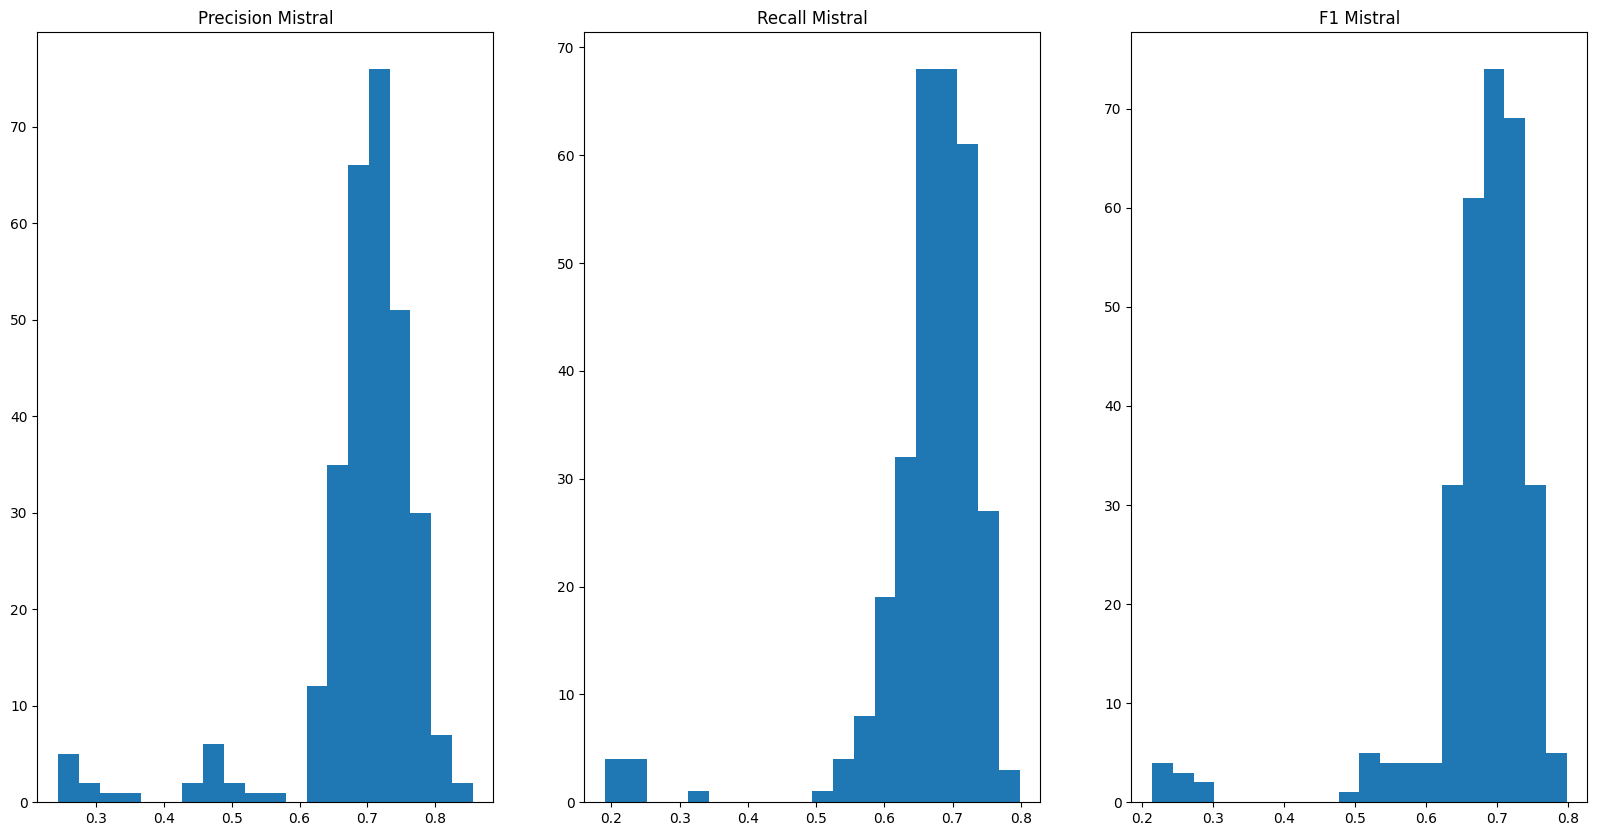

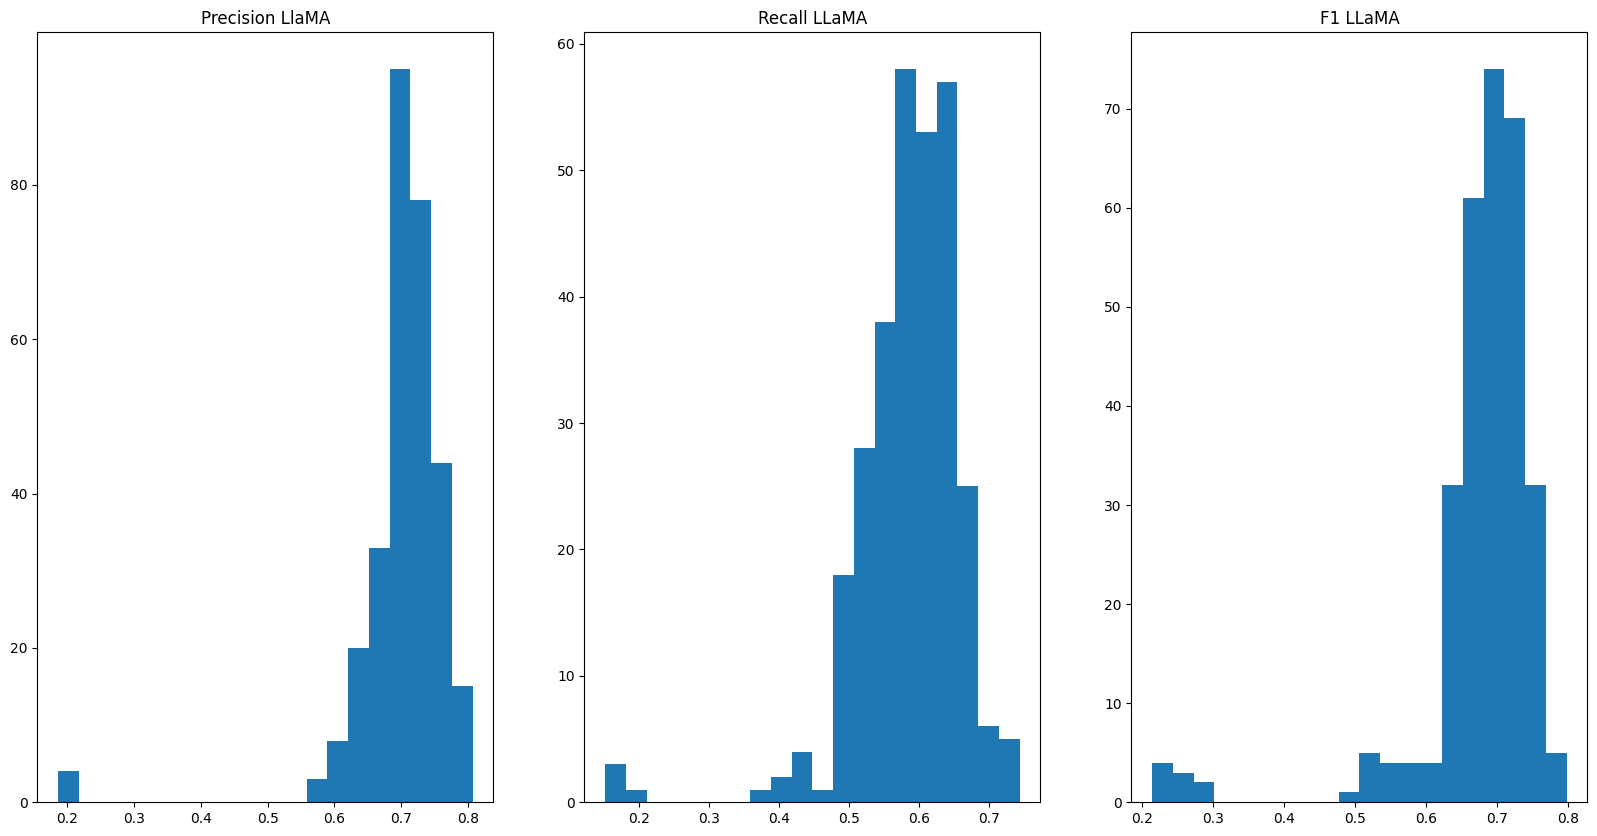

In [6]:
#Create a distribution chart for every precision, recall, and f1 score from mistral and llama
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.hist(summary_300_eval['precision_mistral'], bins=20)
plt.title('Precision Mistral')


plt.subplot(1, 3, 2)
plt.hist(summary_300_eval['recall_mistral'], bins=20)
plt.title('Recall Mistral')

plt.subplot(1, 3, 3)
plt.hist(summary_300_eval['f1_mistral'], bins=20)
plt.title('F1 Mistral')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.hist(summary_300_eval['precision_llama'], bins=20)
plt.title('Precision LlaMA')

plt.subplot(1, 3, 2)
plt.hist(summary_300_eval['recall_llama'], bins=20)
plt.title('Recall LLaMA')

plt.subplot(1, 3, 3)
plt.hist(summary_300_eval['f1_mistral'], bins=20)
plt.title('F1 LLaMA')
plt.show()

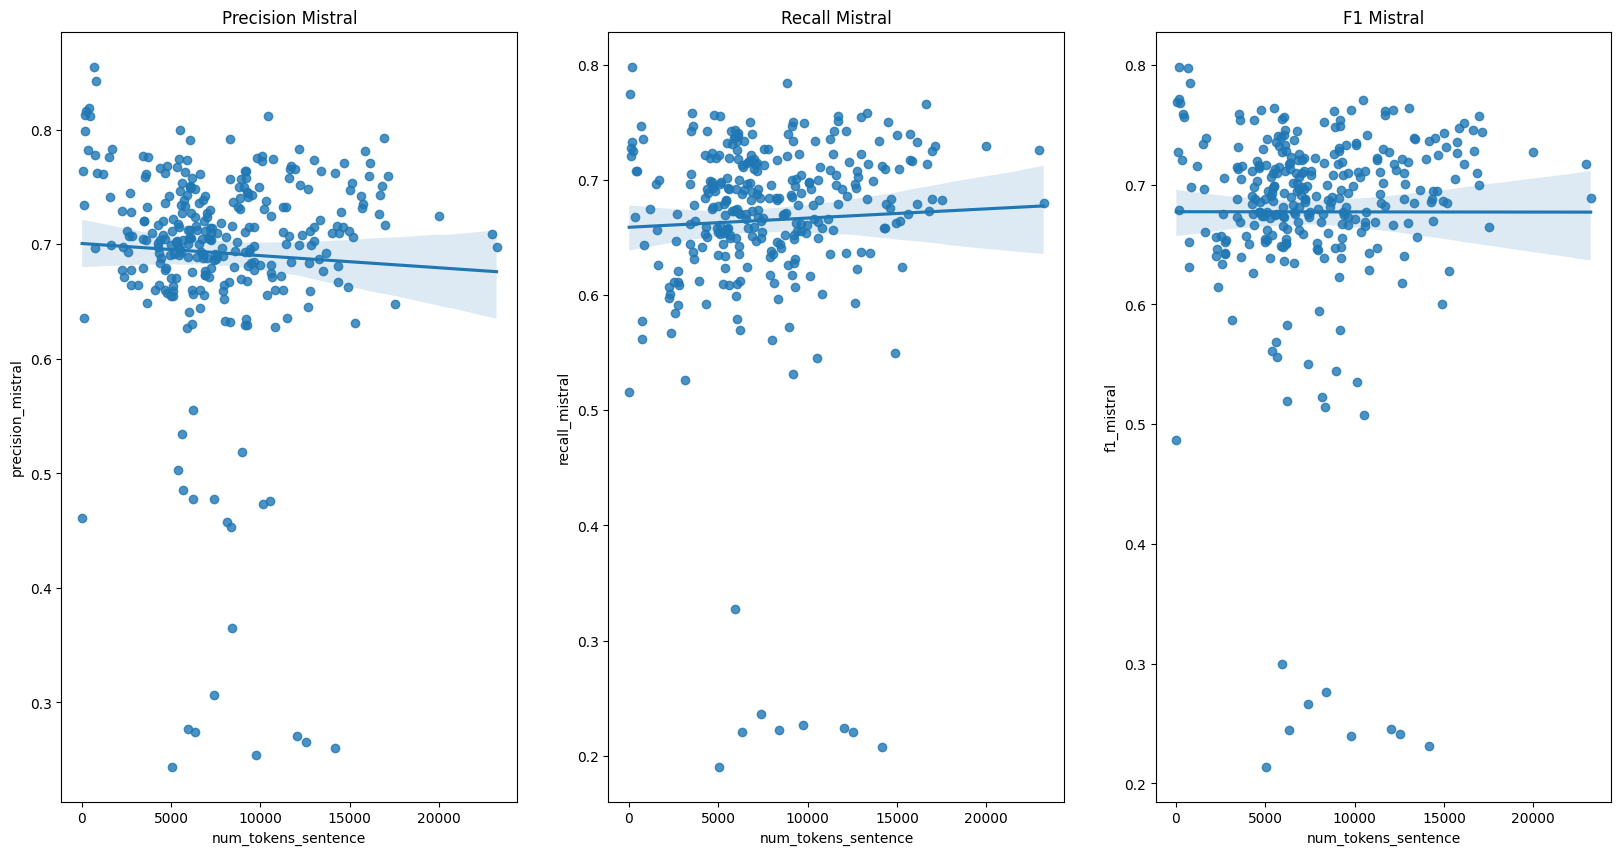

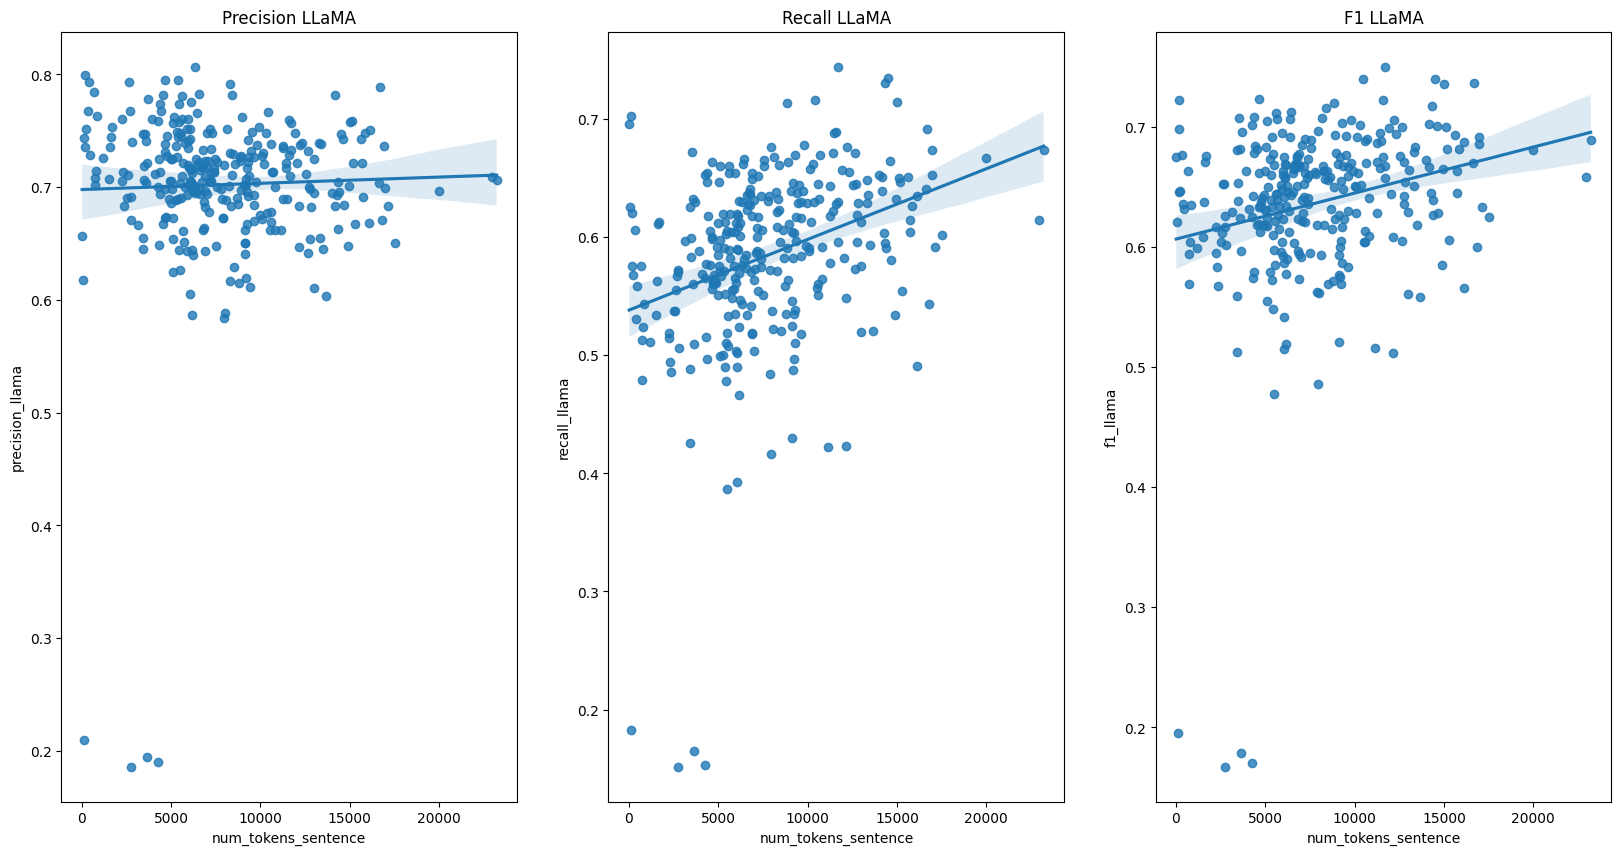

In [7]:
#Create a regression plot between the number of tokens in sentence and precision, recall, and f1 score from mistral and llama
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.regplot(x='num_tokens_sentence', y='precision_mistral', data=summary_300_eval)
plt.title('Precision Mistral')

plt.subplot(1, 3, 2)
sns.regplot(x='num_tokens_sentence', y='recall_mistral', data=summary_300_eval)
plt.title('Recall Mistral')

plt.subplot(1, 3, 3)
sns.regplot(x='num_tokens_sentence', y='f1_mistral', data=summary_300_eval)
plt.title('F1 Mistral')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.regplot(x='num_tokens_sentence', y='precision_llama', data=summary_300_eval)
plt.title('Precision LLaMA')

plt.subplot(1, 3, 2)
sns.regplot(x='num_tokens_sentence', y='recall_llama', data=summary_300_eval)
plt.title('Recall LLaMA')

plt.subplot(1, 3, 3)
sns.regplot(x='num_tokens_sentence', y='f1_llama', data=summary_300_eval)
plt.title('F1 LLaMA')
plt.show()

In [8]:
#Calculate the number of data points where the precision, recall, and f1 score from mistral and llama are below 0.6 as percentage of the total number of data points
print("Number of data points where precision_mistral is below 0.6: ", len(summary_300_eval[summary_300_eval['precision_mistral'] < 0.6]))
print("Number of data points where recall_mistral is below 0.6: ", len(summary_300_eval[summary_300_eval['recall_mistral'] < 0.6]))
print("Number of data points where f1_mistral is below 0.6: ", len(summary_300_eval[summary_300_eval['f1_mistral'] < 0.6]))
print("Number of data points where precision_llama is below 0.6: ", len(summary_300_eval[summary_300_eval['precision_llama'] < 0.6]))
print("Number of data points where recall_llama is below 0.6: ", len(summary_300_eval[summary_300_eval['recall_llama'] < 0.6]))
print("Number of data points where f1_llama is below 0.6: ", len(summary_300_eval[summary_300_eval['f1_llama'] < 0.6]))

Number of data points where precision_mistral is below 0.6:  21
Number of data points where recall_mistral is below 0.6:  28
Number of data points where f1_mistral is below 0.6:  24
Number of data points where precision_llama is below 0.6:  7
Number of data points where recall_llama is below 0.6:  161
Number of data points where f1_llama is below 0.6:  54


Now combine the 100 datapoints with 300 datapoints to have the total sample of true representation

In [10]:
#combine summary_100_eval and summary_300_eval as summary_400_eval
summary_400_eval = pd.concat([summary_100_eval, summary_300_eval], ignore_index=True)

In [2]:
#Import summary_400_eval from pickle
with open('Datasets/summary_400_eval.pkl', 'rb') as f:
    summary_400_eval = pickle.load(f)

In [11]:
#call summary_400_eval head
summary_400_eval.head()

,article_id,sentence,processed_sentence,summary_mistral,summary_llama,precision_mistral,recall_mistral,f1_mistral,precision_llama,recall_llama,f1_llama,num_tokens_sentence,num_tokens_processed_sentence
0,50450,Association for Information Systems AIS Electr...,association for information systems ais electr...,The study aims to examine the differences in ...,\n\nThe article presents the research of the \...,0.718787,0.658720,0.687444,0.732148,0.573293,0.643055,NaN,NaN
1,13667,Communications of the Association for Informat...,communications of the association for informat...,The longitudinal study on the supply and dema...,Default Summary Default Summary Default Summary,0.710817,0.731577,0.721048,0.185275,0.166151,0.175193,NaN,NaN
2,11457,Effective organizational improvisation in info...,effective organizational improvisation in info...,The study focuses on understanding organizati...,Default Summary \nThe text is an abstract of a...,0.704064,0.697286,0.700659,0.692760,0.581827,0.632466,NaN,NaN
3,46549,Researching the Costs of Information Systems T...,researching the costs of information systems t...,The paper examines research gaps in understan...,\n\nThe text summarizes a research paper that ...,0.630737,0.665575,0.647688,0.721754,0.666411,0.692979,NaN,NaN
4,30587,Holographic Recommendations in Brick - and - M...,holographic recommendations in brick and morta...,The researchers propose an in-store recommend...,\n\nThe text presents a research project that ...,0.672580,0.657886,0.665152,0.715184,0.600278,0.652712,NaN,NaN


In [12]:
#Check the total number of row in summary_400_eval
len(summary_400_eval)

400

In [13]:
#Add a new column to the dataframe with the number of tokens in sentence and processed_sentence
summary_400_eval['num_tokens_sentence'] = summary_400_eval['sentence'].apply(lambda x: len(x.split()))
summary_400_eval['num_tokens_processed_sentence'] = summary_400_eval['processed_sentence'].apply(lambda x: len(x.split()))

#Call summary_400_eval head
summary_400_eval.head()

,article_id,sentence,processed_sentence,summary_mistral,summary_llama,precision_mistral,recall_mistral,f1_mistral,precision_llama,recall_llama,f1_llama,num_tokens_sentence,num_tokens_processed_sentence
0,50450,Association for Information Systems AIS Electr...,association for information systems ais electr...,The study aims to examine the differences in ...,\n\nThe article presents the research of the \...,0.718787,0.658720,0.687444,0.732148,0.573293,0.643055,3431,2851
1,13667,Communications of the Association for Informat...,communications of the association for informat...,The longitudinal study on the supply and dema...,Default Summary Default Summary Default Summary,0.710817,0.731577,0.721048,0.185275,0.166151,0.175193,8619,6617
2,11457,Effective organizational improvisation in info...,effective organizational improvisation in info...,The study focuses on understanding organizati...,Default Summary \nThe text is an abstract of a...,0.704064,0.697286,0.700659,0.692760,0.581827,0.632466,9737,7896
3,46549,Researching the Costs of Information Systems T...,researching the costs of information systems t...,The paper examines research gaps in understan...,\n\nThe text summarizes a research paper that ...,0.630737,0.665575,0.647688,0.721754,0.666411,0.692979,15438,12924
4,30587,Holographic Recommendations in Brick - and - M...,holographic recommendations in brick and morta...,The researchers propose an in-store recommend...,\n\nThe text presents a research project that ...,0.672580,0.657886,0.665152,0.715184,0.600278,0.652712,5653,4676


In [14]:
#Calculate the average of every precision, recall, and F1 for Mistral and LLaMA

#Calculate and print precision_mistral
precision_mistral = summary_400_eval['precision_mistral'].mean()
print("Precision Mistral: ", precision_mistral)

#Calculate and print recall_mistral
recall_mistral = summary_400_eval['recall_mistral'].mean()
print("Recall Mistral: ", recall_mistral)

#Calculate and print f1_mistral
f1_mistral = summary_400_eval['f1_mistral'].mean()
print("F1 Mistral: ", f1_mistral)

#Calculate and print precision_llama
precision_llama = summary_400_eval['precision_llama'].mean()
print("Precision Llama: ", precision_llama)

#Calculate and print recall_llama
recall_llama = summary_400_eval['recall_llama'].mean()
print("Recall Llama: ", recall_llama)

#Calculate and print f1_llama
f1_llama = summary_400_eval['f1_llama'].mean()
print("F1 Llama: ", f1_llama)

Precision Mistral:  0.6915227916836738
Recall Mistral:  0.6637681948393583
F1 Mistral:  0.6760770579427481
Precision Llama:  0.7014523243159055
Recall Llama:  0.5825477648153901
F1 Llama:  0.6346843694150448


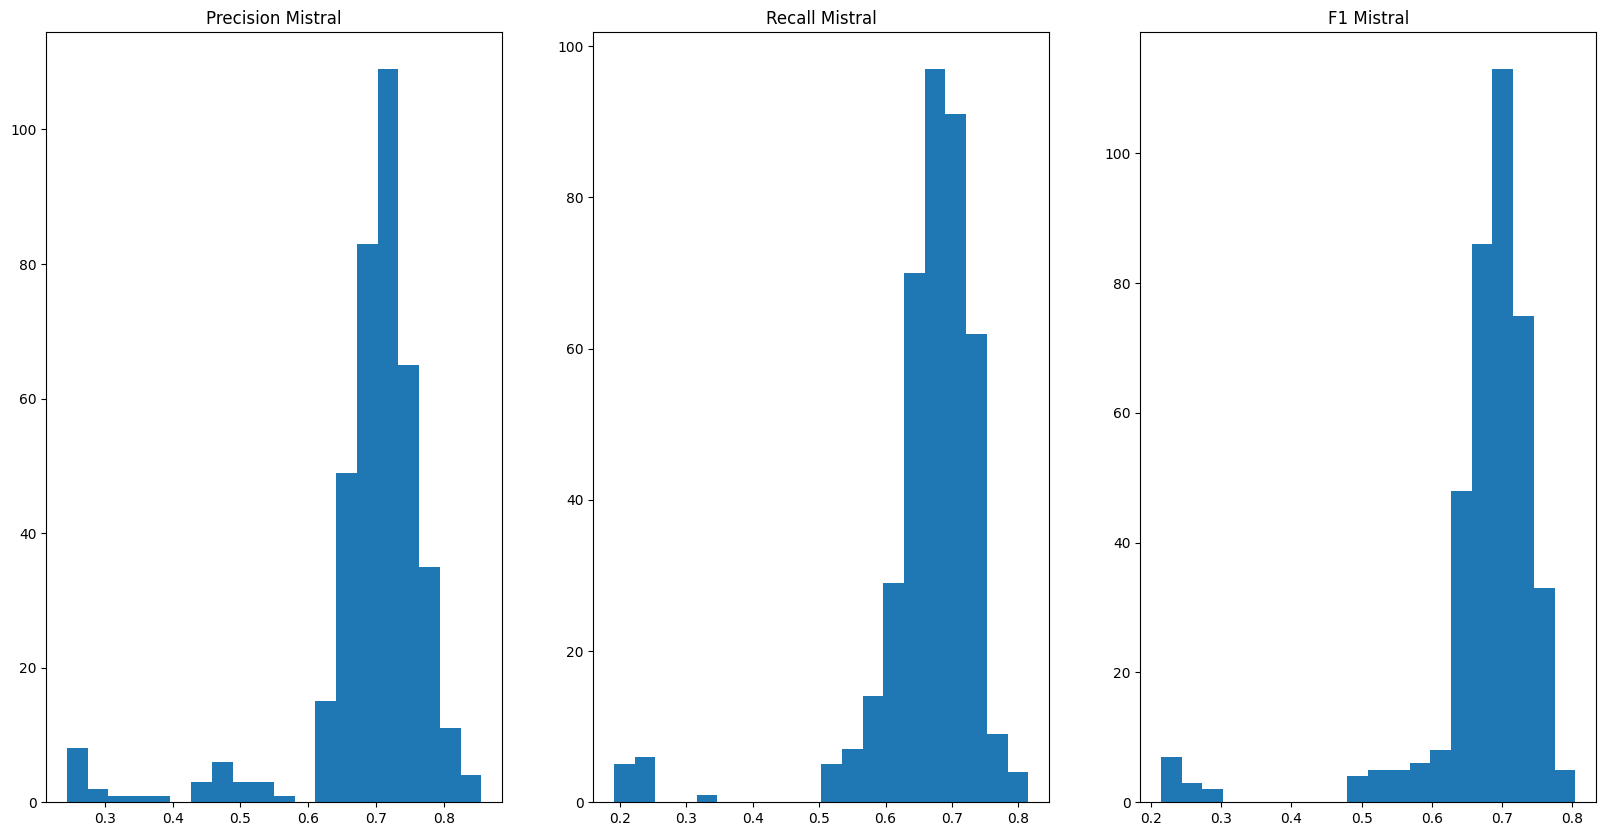

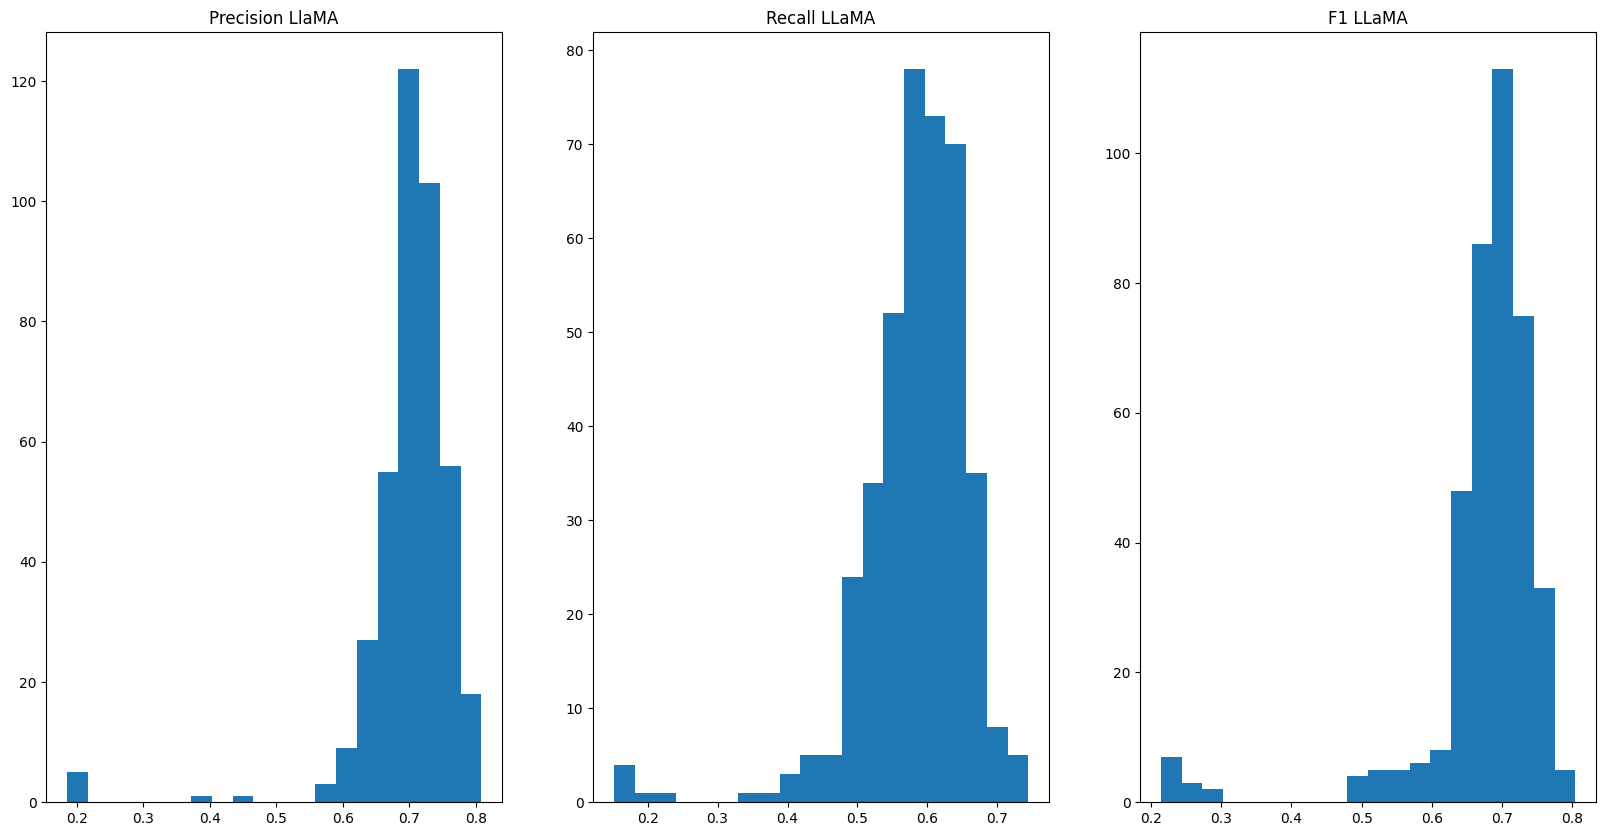

In [15]:
#Create a distribution chart for every precision, recall, and f1 score from mistral and llama
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.hist(summary_400_eval['precision_mistral'], bins=20)
plt.title('Precision Mistral')


plt.subplot(1, 3, 2)
plt.hist(summary_400_eval['recall_mistral'], bins=20)
plt.title('Recall Mistral')

plt.subplot(1, 3, 3)
plt.hist(summary_400_eval['f1_mistral'], bins=20)
plt.title('F1 Mistral')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.hist(summary_400_eval['precision_llama'], bins=20)
plt.title('Precision LlaMA')

plt.subplot(1, 3, 2)
plt.hist(summary_400_eval['recall_llama'], bins=20)
plt.title('Recall LLaMA')

plt.subplot(1, 3, 3)
plt.hist(summary_400_eval['f1_mistral'], bins=20)
plt.title('F1 LLaMA')
plt.show()

Precision Mistral R squared:  -8921650545.480099
Recall Mistral R squared:  -10167401061.032383
F1 Mistral R squared:  -10233006146.565088


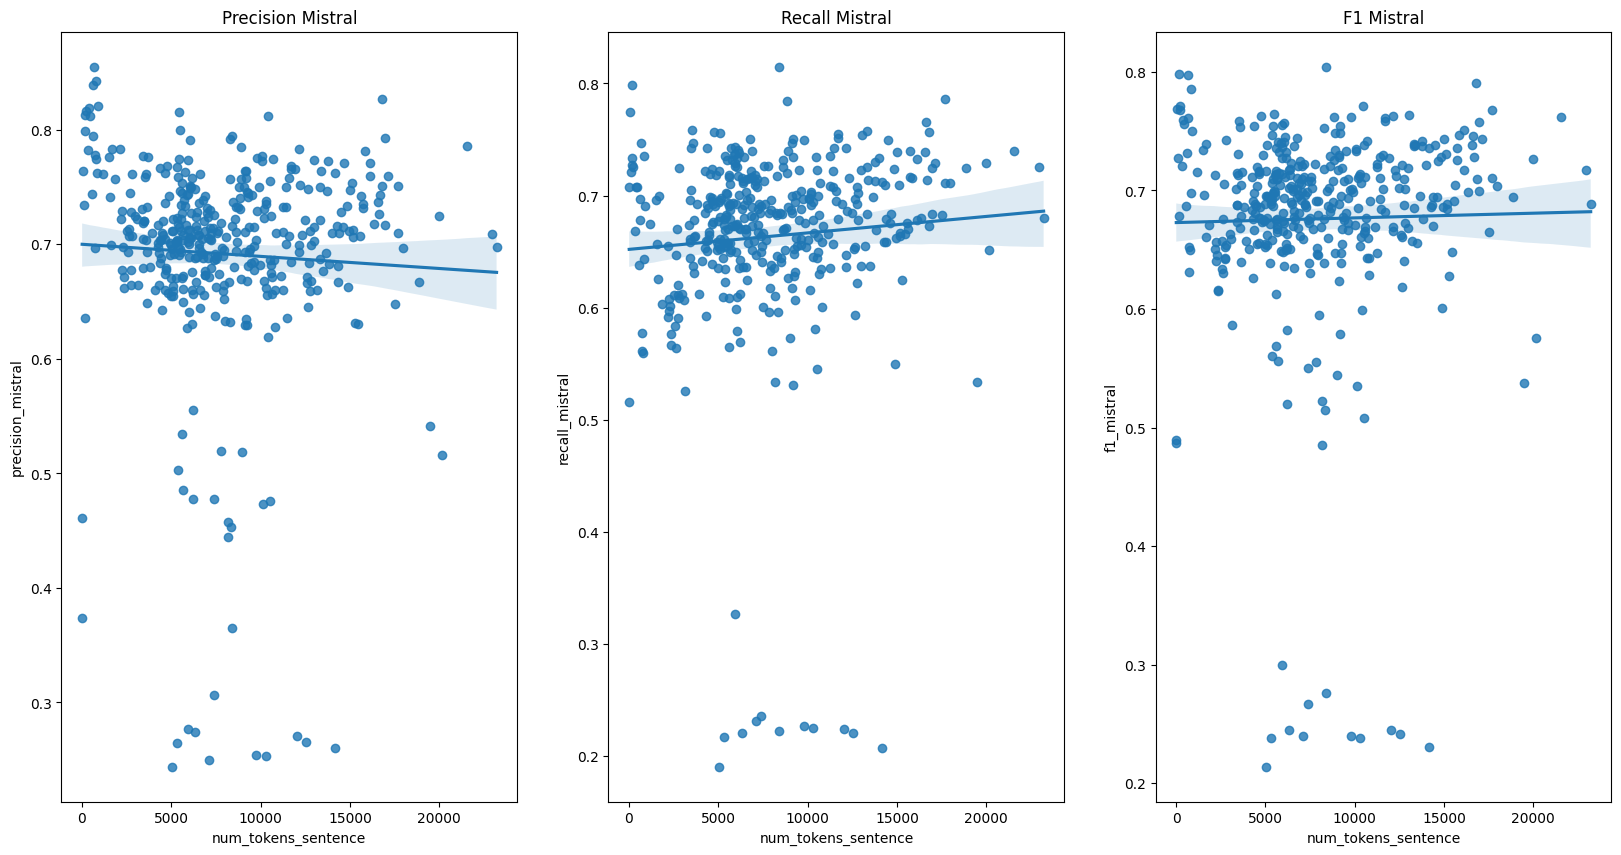

Precision LLaMA R squared:  -15584359069.935434
Recall LLaMA R squared:  -13287316805.912237
F1 LLaMA R squared:  -16265747845.036785


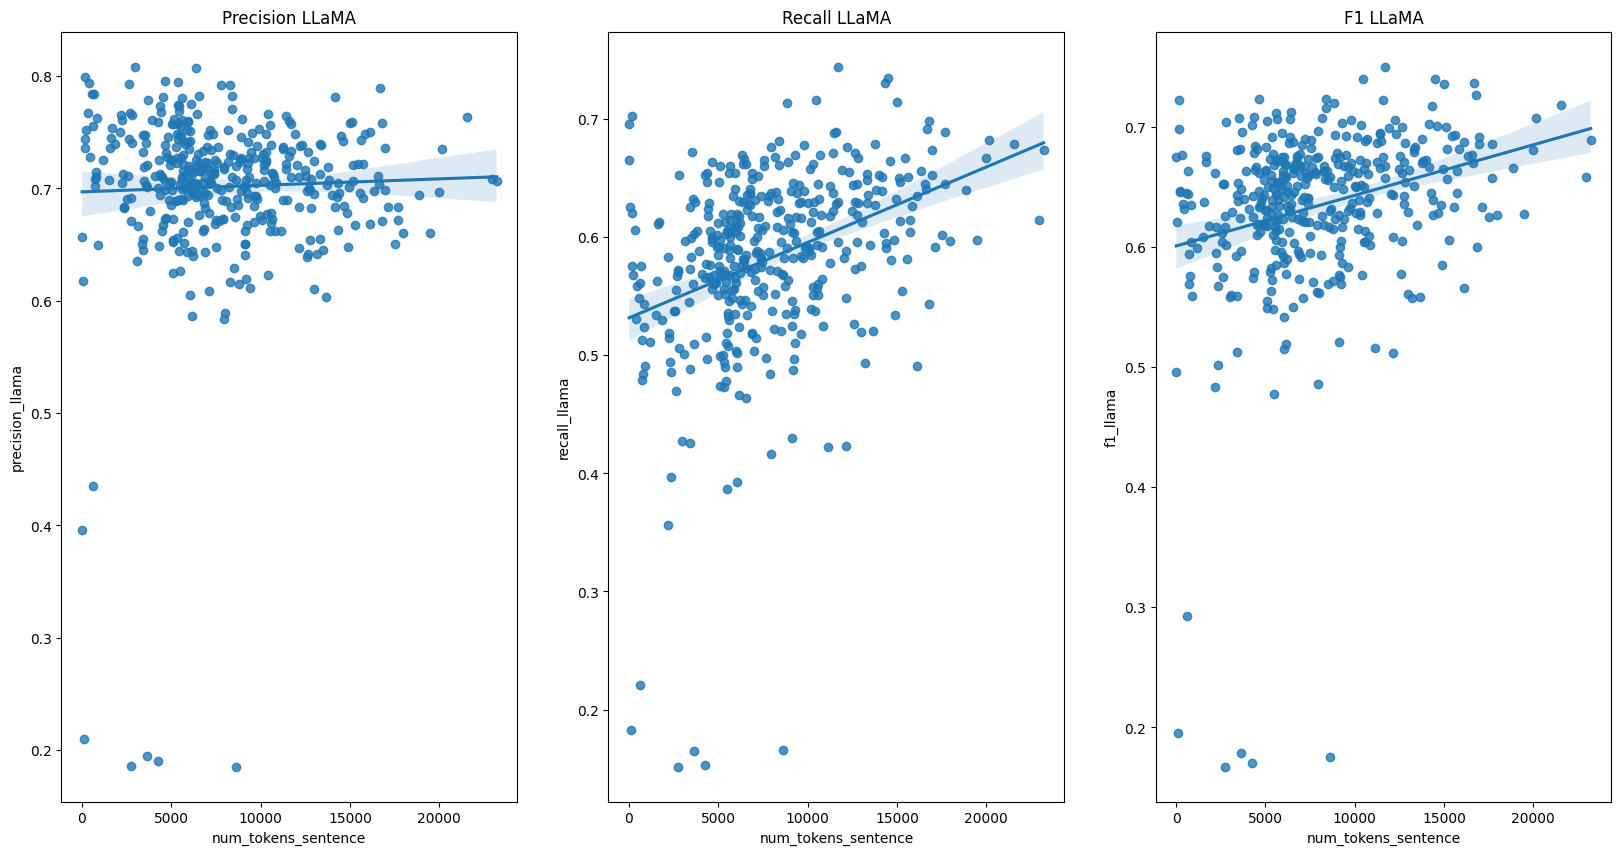

In [7]:
#Create a regression plot between the number of tokens in sentence and precision, recall, and f1 score from mistral and llama, and print their R squared value
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.regplot(x='num_tokens_sentence', y='precision_mistral', data=summary_400_eval)
plt.title('Precision Mistral')
print("Precision Mistral R squared: ", sklearn.metrics.r2_score(summary_400_eval['precision_mistral'], summary_400_eval['num_tokens_sentence']))

plt.subplot(1, 3, 2)
sns.regplot(x='num_tokens_sentence', y='recall_mistral', data=summary_400_eval)
plt.title('Recall Mistral')
print("Recall Mistral R squared: ", sklearn.metrics.r2_score(summary_400_eval['recall_mistral'], summary_400_eval['num_tokens_sentence']))

plt.subplot(1, 3, 3)
sns.regplot(x='num_tokens_sentence', y='f1_mistral', data=summary_400_eval)
plt.title('F1 Mistral')
print("F1 Mistral R squared: ", sklearn.metrics.r2_score(summary_400_eval['f1_mistral'], summary_400_eval['num_tokens_sentence']))
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.regplot(x='num_tokens_sentence', y='precision_llama', data=summary_400_eval)
plt.title('Precision LLaMA')
print("Precision LLaMA R squared: ", sklearn.metrics.r2_score(summary_400_eval['precision_llama'], summary_400_eval['num_tokens_sentence']))

plt.subplot(1, 3, 2)
sns.regplot(x='num_tokens_sentence', y='recall_llama', data=summary_400_eval)
plt.title('Recall LLaMA')
print("Recall LLaMA R squared: ", sklearn.metrics.r2_score(summary_400_eval['recall_llama'], summary_400_eval['num_tokens_sentence']))

plt.subplot(1, 3, 3)
sns.regplot(x='num_tokens_sentence', y='f1_llama', data=summary_400_eval)
plt.title('F1 LLaMA')
print("F1 LLaMA R squared: ", sklearn.metrics.r2_score(summary_400_eval['f1_llama'], summary_400_eval['num_tokens_sentence']))
plt.show()

In [19]:
#create a regression equation model for each of the precision, recall, and f1 score from mistral and llama
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('precision_mistral ~ num_tokens_sentence', data=summary_400_eval).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:      precision_mistral   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9327
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.335
Time:                        22:37:24   Log-Likelihood:                 367.24
No. Observations:                 400   AIC:                            -730.5
Df Residuals:                     398   BIC:                            -722.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7000    

In [20]:
model = ols('recall_mistral ~ num_tokens_sentence', data=summary_400_eval).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         recall_mistral   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.057
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.152
Time:                        22:38:12   Log-Likelihood:                 393.94
No. Observations:                 400   AIC:                            -783.9
Df Residuals:                     398   BIC:                            -775.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6520    

In [21]:
model = ols('f1_mistral ~ num_tokens_sentence', data=summary_400_eval).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             f1_mistral   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1494
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.699
Time:                        22:38:27   Log-Likelihood:                 394.27
No. Observations:                 400   AIC:                            -784.5
Df Residuals:                     398   BIC:                            -776.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6729    

In [22]:

model = ols('precision_llama ~ num_tokens_sentence', data=summary_400_eval).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        precision_llama   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4853
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.486
Time:                        22:39:17   Log-Likelihood:                 478.57
No. Observations:                 400   AIC:                            -953.1
Df Residuals:                     398   BIC:                            -945.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6968    

In [23]:

model = ols('recall_llama ~ num_tokens_sentence', data=summary_400_eval).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           recall_llama   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     57.84
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           2.07e-13
Time:                        22:39:21   Log-Likelihood:                 473.57
No. Observations:                 400   AIC:                            -943.1
Df Residuals:                     398   BIC:                            -935.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5315    

In [24]:

model = ols('f1_llama ~ num_tokens_sentence', data=summary_400_eval).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               f1_llama   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.93
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.28e-07
Time:                        22:39:26   Log-Likelihood:                 500.92
No. Observations:                 400   AIC:                            -997.8
Df Residuals:                     398   BIC:                            -989.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6010    

In [5]:
#Conduct t-test from the precision, recall, and f1 score from mistral and llama
from scipy import stats
print(stats.ttest_rel(summary_400_eval['precision_mistral'], summary_400_eval['precision_llama']))
print(stats.ttest_rel(summary_400_eval['recall_mistral'], summary_400_eval['recall_llama']))
print(stats.ttest_rel(summary_400_eval['f1_mistral'], summary_400_eval['f1_llama']))

TtestResult(statistic=-1.7210063585445528, pvalue=0.08602486800625796, df=399)
TtestResult(statistic=14.758730846441097, pvalue=1.209799215412137e-39, df=399)
TtestResult(statistic=7.490220451457564, pvalue=4.461533048504443e-13, df=399)


In [6]:
#Conduct correlation analysis between the precision, recall, and f1 score from mistral and llama
print(summary_400_eval[['precision_mistral', 'precision_llama']].corr())
print(summary_400_eval[['recall_mistral', 'recall_llama']].corr())
print(summary_400_eval[['f1_mistral', 'f1_llama']].corr())

                   precision_mistral  precision_llama
precision_mistral           1.000000         0.101001
precision_llama             0.101001         1.000000
                recall_mistral  recall_llama
recall_mistral        1.000000      0.167647
recall_llama          0.167647      1.000000
            f1_mistral  f1_llama
f1_mistral    1.000000  0.085288
f1_llama      0.085288  1.000000


In [17]:
#Save summary_400_eval as pickle
with open('Datasets/summary_400_eval.pkl', 'wb') as f:
    pickle.dump(summary_400_eval, f)